In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("CarPrice_Assignment (1).csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df['fueleconomy']=(0.55*df['citympg'])+(0.45*df['highwaympg'])
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80


In [6]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80


In [7]:
df=df.drop(['citympg'],axis=1)

In [8]:
df.shape

(205, 26)

In [9]:
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,fueleconomy
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,27,13495.0,23.70
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,27,16500.0,23.70
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,26,16500.0,22.15
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,30,13950.0,26.70
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,22,17450.0,19.80


In [10]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [11]:
df.CompanyName = df.CompanyName.str.lower()

def replace_name(a,b):
    df.CompanyName.replace(a,b,inplace=True)

replace_name('alfa-romero','alfa-romeo')
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.CompanyName.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [12]:
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'highwaympg', 'price',
       'fueleconomy'],
      dtype='object')

In [13]:
df=df.drop(['car_ID'],axis=1)

In [14]:
df

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,fueleconomy
0,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,27,13495.0,23.70
1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,27,16500.0,23.70
2,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,26,16500.0,22.15
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,30,13950.0,26.70
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,22,17450.0,19.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,28,16845.0,25.25
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,25,19045.0,21.70
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,23,21485.0,20.25
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,27,22470.0,26.45


In [15]:
df['price'] = df['price'].astype('int')
temp = df.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
df_bin=['Budget','Medium','Highend']
df['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=df_bin)
df.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,fueleconomy,carsrange
0,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,27,13495,23.70,Medium
1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,27,16500,23.70,Medium
2,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,26,16500,22.15,Medium
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,30,13950,26.70,Medium
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,22,17450,19.80,Medium


In [16]:
dummies=pd.get_dummies(df[['fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber','carsrange','fuelsystem','CompanyName','doornumber','enginelocation']],drop_first=True)
dummies

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,...,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,doornumber_two,enginelocation_rear
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
201,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
202,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
203,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
df=df.drop(['fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber','carsrange','fuelsystem','CompanyName','doornumber','enginelocation'],axis=1)
df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,fueleconomy
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,27,13495,23.70
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,27,16500,23.70
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,26,16500,22.15
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,30,13950,26.70
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,22,17450,19.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,28,16845,25.25
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,25,19045,21.70
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,23,21485,20.25
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,27,22470,26.45


In [18]:
df=pd.concat([df,dummies],axis=1)
df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,doornumber_two,enginelocation_rear
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,1,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,1,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,1,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
df.isnull().sum()

symboling                 0
wheelbase                 0
carlength                 0
carwidth                  0
carheight                 0
                         ..
CompanyName_toyota        0
CompanyName_volkswagen    0
CompanyName_volvo         0
doornumber_two            0
enginelocation_rear       0
Length: 67, dtype: int64

<AxesSubplot:>

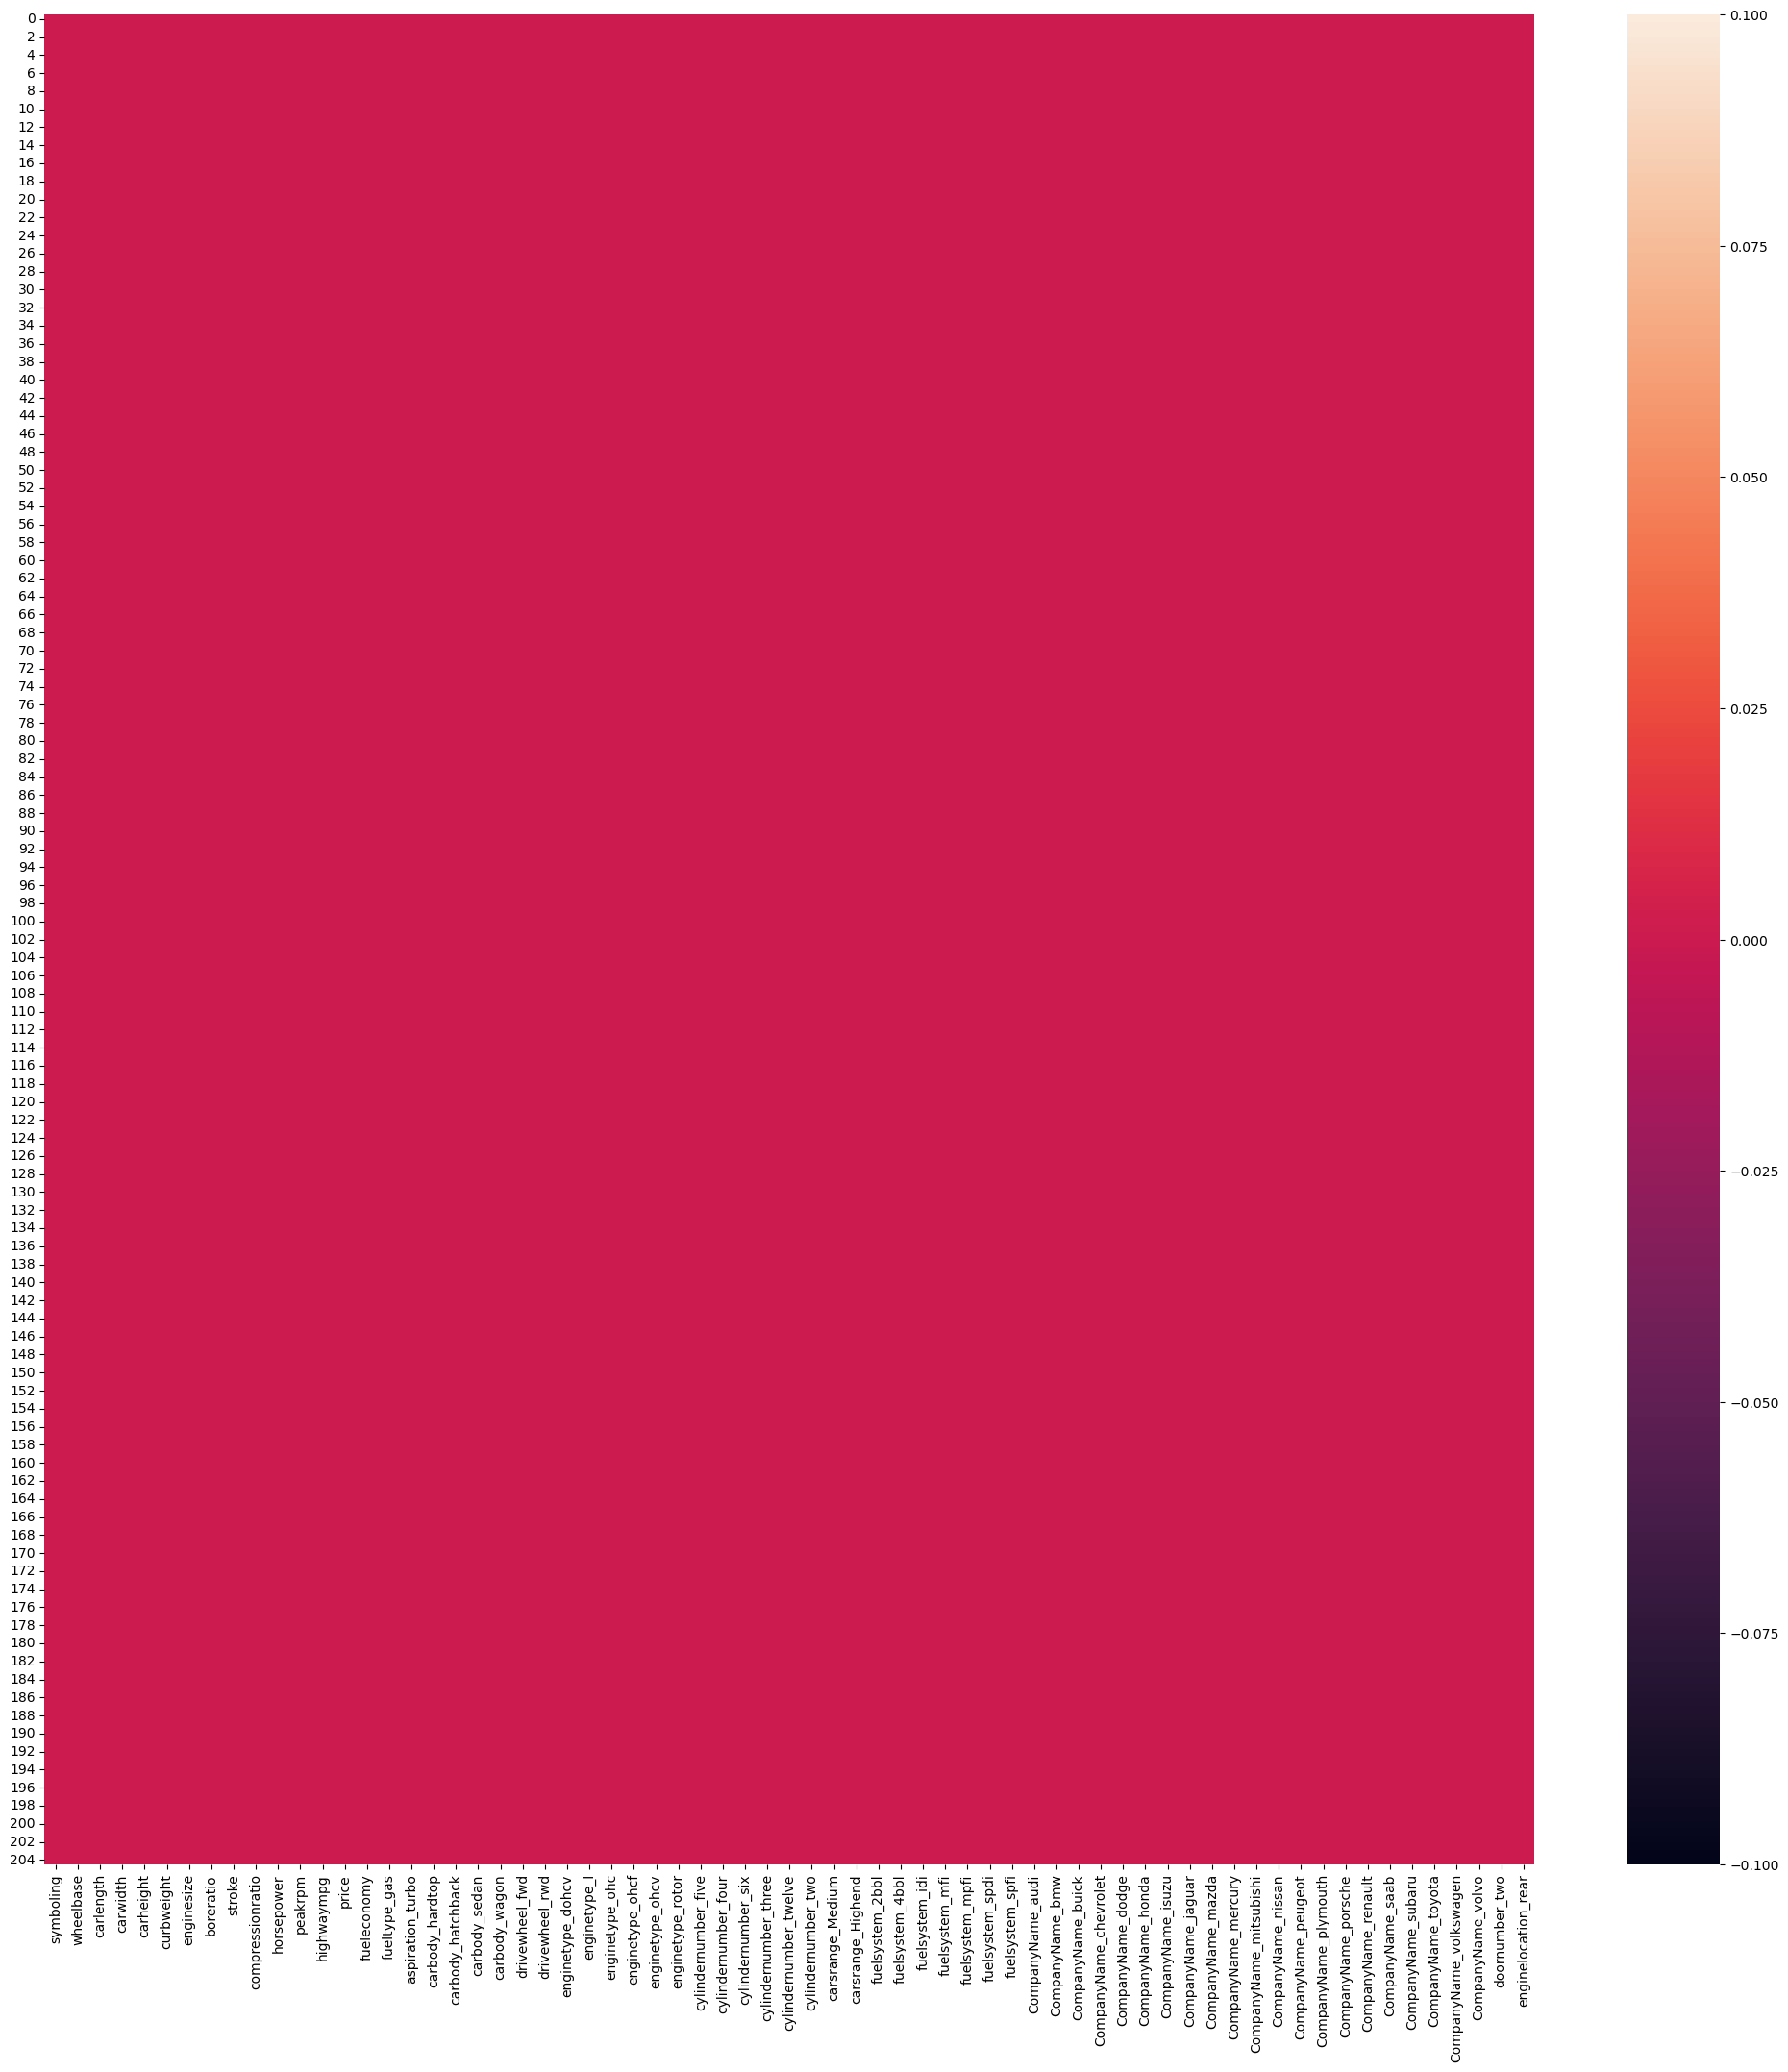

In [20]:
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 67 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   wheelbase               205 non-null    float64
 2   carlength               205 non-null    float64
 3   carwidth                205 non-null    float64
 4   carheight               205 non-null    float64
 5   curbweight              205 non-null    int64  
 6   enginesize              205 non-null    int64  
 7   boreratio               205 non-null    float64
 8   stroke                  205 non-null    float64
 9   compressionratio        205 non-null    float64
 10  horsepower              205 non-null    int64  
 11  peakrpm                 205 non-null    int64  
 12  highwaympg              205 non-null    int64  
 13  price                   205 non-null    int32  
 14  fueleconomy             205 non-null    fl

In [22]:
df['compressionratio'].unique()

array([ 9.  , 10.  ,  8.  ,  8.5 ,  8.3 ,  7.  ,  8.8 ,  9.5 ,  9.6 ,
        9.41,  9.4 ,  7.6 ,  9.2 , 10.1 ,  9.1 ,  8.1 , 11.5 ,  8.6 ,
       22.7 , 22.  , 21.5 ,  7.5 , 21.9 ,  7.8 ,  8.4 , 21.  ,  8.7 ,
        9.31,  9.3 ,  7.7 , 22.5 , 23.  ])

In [23]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
col_vars=['wheelbase', 'carheight', 'stroke', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df[col_vars]=scale.fit_transform(df[col_vars])

In [24]:
df['price']

0      0.207959
1      0.282558
2      0.282558
3      0.219254
4      0.306142
         ...   
200    0.291123
201    0.345738
202    0.406311
203    0.430763
204    0.434611
Name: price, Length: 205, dtype: float64

In [25]:
cor=df.corr()
cor

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,doornumber_two,enginelocation_rear
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,...,0.025103,0.224755,0.013252,0.232847,-0.067071,-0.094046,0.167106,-0.403849,0.664073,0.212471
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,...,-0.105511,-0.170472,-0.043896,0.009927,-0.107161,-0.046785,-0.047664,0.306228,-0.447357,-0.187790
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,...,-0.139780,-0.048682,0.041138,0.177076,-0.105172,-0.073906,-0.030714,0.285398,-0.398568,-0.050989
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,...,-0.143778,0.089564,0.029787,0.048052,-0.111605,-0.164234,-0.033924,0.228758,-0.207168,-0.051698
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,...,-0.135256,-0.170265,-0.035625,0.169192,0.002570,-0.000530,0.149194,0.245342,-0.552208,-0.106234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CompanyName_toyota,-0.094046,-0.046785,-0.073906,-0.164234,-0.000530,-0.094786,-0.083807,-0.079203,-0.000570,0.021501,...,-0.080866,-0.068002,-0.042689,-0.074679,-0.107242,1.000000,-0.107242,-0.102411,-0.001321,-0.052413
CompanyName_volkswagen,0.167106,-0.047664,-0.030714,-0.033924,0.149194,-0.101966,-0.117994,-0.184355,0.115246,0.219153,...,-0.046884,-0.039426,-0.024750,-0.043297,-0.062176,-0.107242,1.000000,-0.059376,-0.053105,-0.030388
CompanyName_volvo,-0.403849,0.306228,0.285398,0.228758,0.245342,0.221127,0.088077,0.293458,-0.082315,0.005092,...,-0.044773,-0.037650,-0.023635,-0.041347,-0.059376,-0.102411,-0.059376,1.000000,-0.210653,-0.029019
doornumber_two,0.664073,-0.447357,-0.398568,-0.207168,-0.552208,-0.197379,-0.020742,-0.119258,0.011082,-0.177888,...,-0.003960,0.178730,0.012196,0.021335,-0.094976,-0.001321,-0.053105,-0.210653,1.000000,0.137757


In [26]:
correlated_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.8:
            colname1 = cor.columns[i]
            colname2 = cor.columns[j]
            print(abs(cor.iloc[i, j]), "--", i, '--', j, '--', colname1, '--', colname2)
            correlated_features.add(colname1)
            correlated_features.add(colname2)

0.8745874759642627 -- 2 -- 1 -- carlength -- wheelbase
0.8411182684818456 -- 3 -- 2 -- carwidth -- carlength
0.8777284608306424 -- 5 -- 2 -- curbweight -- carlength
0.867032464679124 -- 5 -- 3 -- curbweight -- carwidth
0.850594073426277 -- 6 -- 5 -- enginesize -- curbweight
0.8097686545377307 -- 10 -- 6 -- horsepower -- enginesize
0.83530543720437 -- 13 -- 5 -- price -- curbweight
0.8741451426986431 -- 13 -- 6 -- price -- enginesize
0.8081381197889792 -- 13 -- 10 -- price -- horsepower
0.9916921560568325 -- 14 -- 12 -- fueleconomy -- highwaympg
0.9843560568767543 -- 15 -- 9 -- fueltype_gas -- compressionratio
0.9119963520218878 -- 22 -- 21 -- drivewheel_rwd -- drivewheel_fwd
1.0 -- 34 -- 28 -- cylindernumber_two -- enginetype_rotor
0.8001636723219913 -- 36 -- 13 -- carsrange_Highend -- price
0.8638791169561112 -- 38 -- 28 -- fuelsystem_4bbl -- enginetype_rotor
0.8638791169561112 -- 38 -- 34 -- fuelsystem_4bbl -- cylindernumber_two
0.9843560568767543 -- 39 -- 9 -- fuelsystem_idi -- comp

In [27]:
print(cor.columns)
print('------')
print(correlated_features)

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'highwaympg', 'price', 'fueleconomy',
       'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'carsrange_Medium', 'carsrange_Highend', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'CompanyName_audi', 'CompanyName_bmw', 'CompanyName_buick',
       'CompanyName_chevrolet', 'CompanyName_dodge', 'CompanyName_honda',
       '

In [28]:
cor2=df[correlated_features].corr()
cor2

,enginetype_rotor,drivewheel_fwd,CompanyName_peugeot,CompanyName_subaru,fueltype_gas,enginetype_l,horsepower,fuelsystem_4bbl,drivewheel_rwd,cylindernumber_two,...,carwidth,enginesize,carlength,highwaympg,compressionratio,fuelsystem_idi,carsrange_Highend,enginetype_ohcf,curbweight,price
enginetype_rotor,1.000000,-0.167615,-0.033591,-0.035176,0.046383,-0.035176,0.019250,0.863879,0.183789,1.000000,...,-0.013699,-0.184762,-0.057877,-0.159173,-0.026436,-0.046383,-0.051369,-0.039637,-0.039196,-0.004544
drivewheel_fwd,-0.167615,1.000000,-0.282928,-0.001029,0.090342,-0.254096,-0.544438,-0.144799,-0.911996,-0.167615,...,-0.472116,-0.518391,-0.508714,0.600828,-0.062683,-0.090342,-0.432661,-0.067697,-0.666039,-0.601951
CompanyName_peugeot,-0.033591,-0.282928,1.000000,-0.059376,-0.286482,0.954956,-0.025950,-0.029019,0.310230,-0.033591,...,0.276302,0.051079,0.330602,-0.142632,0.231817,0.286482,-0.086709,-0.066906,0.305064,0.066105
CompanyName_subaru,-0.035176,-0.001029,-0.059376,1.000000,0.081986,-0.062176,-0.112939,-0.030388,-0.191392,-0.035176,...,-0.111605,-0.118994,-0.105172,-0.000044,-0.083437,-0.081986,-0.090798,0.887448,-0.114888,-0.148167
fueltype_gas,0.046383,0.090342,-0.286482,0.081986,1.000000,-0.268163,0.163926,0.040070,-0.122035,0.046383,...,-0.233880,-0.069594,-0.212679,-0.191392,-0.984356,-1.000000,-0.084807,0.092384,-0.217275,-0.105680
enginetype_l,-0.035176,-0.254096,0.954956,-0.062176,-0.268163,1.000000,-0.054469,-0.030388,0.281842,-0.035176,...,0.210771,0.016063,0.261715,-0.069615,0.219153,0.268163,-0.090798,-0.070062,0.250124,0.042268
horsepower,0.019250,-0.544438,-0.025950,-0.112939,0.163926,-0.054469,1.000000,-0.009630,0.575564,0.019250,...,0.640732,0.809769,0.552623,-0.770544,-0.204326,-0.163926,0.557006,0.044752,0.750739,0.808138
fuelsystem_4bbl,0.863879,-0.144799,-0.029019,-0.030388,0.040070,-0.030388,-0.009630,1.000000,0.158772,0.863879,...,-0.011834,-0.166946,-0.049998,-0.137506,-0.022838,-0.040070,-0.044376,-0.034242,-0.040801,-0.017306
drivewheel_rwd,0.183789,-0.911996,0.310230,-0.191392,-0.122035,0.281842,0.575564,0.158772,1.000000,0.183789,...,0.511149,0.565509,0.538370,-0.566149,0.105185,0.122035,0.474411,-0.099320,0.669987,0.638957
cylindernumber_two,1.000000,-0.167615,-0.033591,-0.035176,0.046383,-0.035176,0.019250,0.863879,0.183789,1.000000,...,-0.013699,-0.184762,-0.057877,-0.159173,-0.026436,-0.046383,-0.051369,-0.039637,-0.039196,-0.004544


<AxesSubplot:>

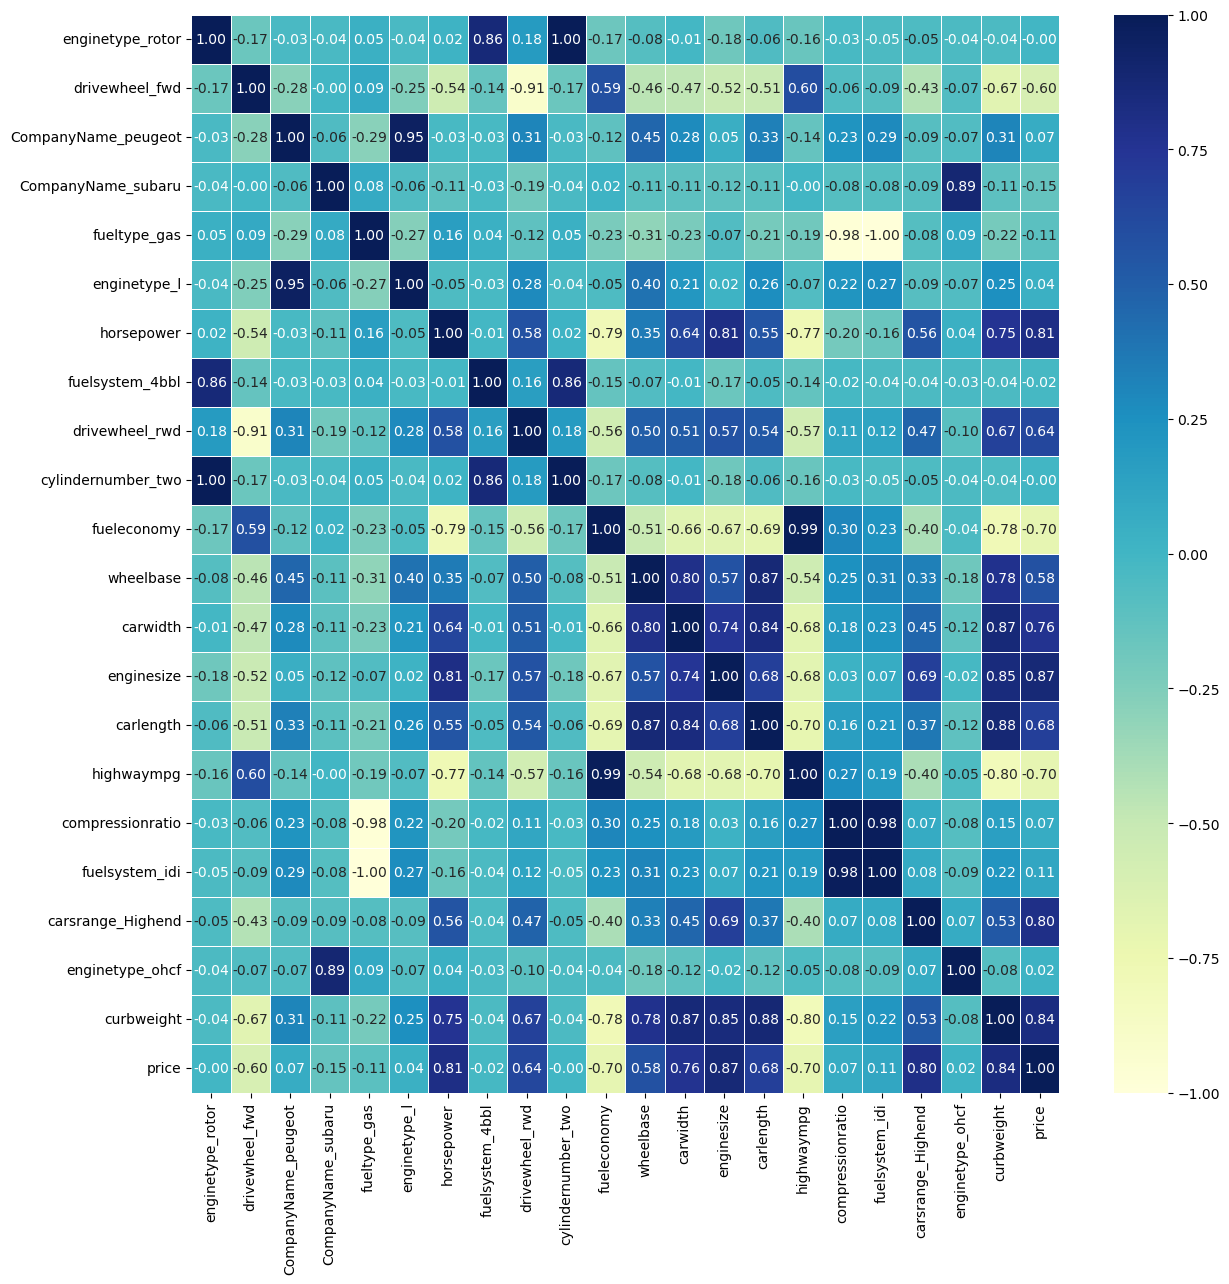

In [29]:
plt.figure(figsize=(14,14)) 
sns.heatmap(cor2, annot=True, linewidths=.5, fmt=".2f", cmap="YlGnBu")

In [30]:
x=df.drop(['price'],axis=1)
x

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,doornumber_two,enginelocation_rear
0,3,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,9.0,...,0,0,0,0,0,0,0,0,1,0
1,3,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,9.0,...,0,0,0,0,0,0,0,0,1,0
2,1,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,9.0,...,0,0,0,0,0,0,0,0,1,0
3,2,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,8.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.885714,0.514286,9.5,...,0,0,0,0,0,0,0,1,0,0
201,-1,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.885714,0.514286,8.7,...,0,0,0,0,0,0,0,1,0,0
202,-1,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.742857,0.380952,8.8,...,0,0,0,0,0,0,0,1,0,0
203,-1,0.655977,0.711940,0.716667,0.641667,0.670675,0.316981,0.335714,0.633333,23.0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
y=df['price']
y

0      0.207959
1      0.282558
2      0.282558
3      0.219254
4      0.306142
         ...   
200    0.291123
201    0.345738
202    0.406311
203    0.430763
204    0.434611
Name: price, Length: 205, dtype: float64

In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
def building_model(x,y):
    x=sm.add_constant(x)
    lm=sm.OLS(y,x).fit()
    print(lm.summary())
    return lm

In [34]:
def checkVIF(x):
    vif=pd.DataFrame
    vif['features']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape())]
    vif['VIF']=round(vif['VIF'],2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [35]:
model1=building_model(x,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     68.86
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           6.09e-82
Time:                        00:35:56   Log-Likelihood:                 388.85
No. Observations:                 205   AIC:                            -655.7
Df Residuals:                     144   BIC:                            -453.0
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [36]:
x.drop(['symboling','carheight','boreratio','stroke','compressionratio','horsepower'], axis=1,inplace=True)

In [37]:
x.drop(['fueleconomy'],axis=1,inplace=True)

In [38]:
x.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'peakrpm', 'highwaympg', 'fueltype_gas', 'aspiration_turbo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'carsrange_Medium', 'carsrange_Highend',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'CompanyName_audi', 'CompanyName_bmw',
       'CompanyName_buick', 'CompanyName_chevrolet', 'CompanyName_dodge',
       'CompanyName_honda', 'CompanyName_isuzu', 'CompanyName_jaguar',
       'CompanyName_mazda', 'CompanyName_mercury', 'CompanyName_mitsubishi',
  

In [39]:
x.drop(['highwaympg','carbody_hardtop','drivewheel_fwd','drivewheel_fwd','drivewheel_rwd'],axis=1,inplace=True)

In [40]:
lm = LinearRegression()
lm.fit(x,y)

rfe = RFE(lm)
rfe = rfe.fit(x, y)

In [41]:
x.columns[rfe.support_]

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_twelve',
       'cylindernumber_two', 'carsrange_Medium', 'carsrange_Highend',
       'fuelsystem_4bbl', 'fuelsystem_spfi', 'CompanyName_bmw',
       'CompanyName_isuzu', 'CompanyName_mazda', 'CompanyName_mercury',
       'CompanyName_nissan', 'CompanyName_subaru', 'CompanyName_volkswagen',
       'enginelocation_rear'],
      dtype='object')

In [42]:
x_rfe = x[x.columns[rfe.support_]]
x_rfe.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,enginetype_dohcv,enginetype_l,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,...,fuelsystem_4bbl,fuelsystem_spfi,CompanyName_bmw,CompanyName_isuzu,CompanyName_mazda,CompanyName_mercury,CompanyName_nissan,CompanyName_subaru,CompanyName_volkswagen,enginelocation_rear
0,0.058309,0.413433,0.316667,0.411171,0.260377,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.058309,0.413433,0.316667,0.411171,0.260377,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.230321,0.449254,0.433333,0.517843,0.343396,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.384840,0.529851,0.491667,0.329325,0.181132,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.373178,0.529851,0.508333,0.518231,0.283019,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
model2=building_model(x_rfe,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     135.9
Date:                Sun, 04 Dec 2022   Prob (F-statistic):          9.43e-103
Time:                        00:35:57   Log-Likelihood:                 348.27
No. Observations:                 205   AIC:                            -644.5
Df Residuals:                     179   BIC:                            -558.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [44]:
lm = LinearRegression()
lm.fit(x_rfe,y)

rfe = RFE(lm)
rfe = rfe.fit(x_rfe, y)

In [45]:
x_rfe2 = x_rfe[x_rfe.columns[rfe.support_]]
x_rfe2.head()

,carwidth,curbweight,enginesize,enginetype_dohcv,enginetype_ohcf,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,carsrange_Highend,CompanyName_bmw,CompanyName_subaru,enginelocation_rear
0,0.316667,0.411171,0.260377,0,0,0,1,0,0,0,0,0,0
1,0.316667,0.411171,0.260377,0,0,0,1,0,0,0,0,0,0
2,0.433333,0.517843,0.343396,0,0,0,0,1,0,0,0,0,0
3,0.491667,0.329325,0.181132,0,0,0,1,0,0,0,0,0,0
4,0.508333,0.518231,0.283019,0,0,1,0,0,0,0,0,0,0


In [46]:
model3=building_model(x_rfe2,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     210.7
Date:                Sun, 04 Dec 2022   Prob (F-statistic):          1.63e-103
Time:                        00:35:57   Log-Likelihood:                 313.01
No. Observations:                 205   AIC:                            -600.0
Df Residuals:                     192   BIC:                            -556.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [48]:
x_rfe3=x_rfe2.drop(['enginetype_dohcv'],axis=1)

In [49]:
model4=building_model(x_rfe3,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     229.3
Date:                Sun, 04 Dec 2022   Prob (F-statistic):          2.10e-104
Time:                        00:37:39   Log-Likelihood:                 312.27
No. Observations:                 205   AIC:                            -600.5
Df Residuals:                     193   BIC:                            -560.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

In [50]:
x_rfe4=x_rfe3.drop(['cylindernumber_twelve'],axis=1)

In [51]:
model5=building_model(x_rfe4,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     248.6
Date:                Sun, 04 Dec 2022   Prob (F-statistic):          7.49e-105
Time:                        00:38:33   Log-Likelihood:                 310.40
No. Observations:                 205   AIC:                            -598.8
Df Residuals:                     194   BIC:                            -562.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0069    

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_rfe4,y,test_size=0.3,random_state=9)

In [53]:
model6=LinearRegression()
model6.fit(x_train,y_train)

LinearRegression()

In [54]:
y_pred=model6.predict(x_test)

In [55]:
pd.DataFrame({'y_true':y_test,'y_pred':y_pred}).head()

,y_true,y_pred
172,0.311578,0.221648
89,0.009458,0.028774
55,0.144655,0.210429
73,0.889777,0.856438
158,0.069013,0.092143


In [58]:
from sklearn import metrics
model6.score(x_test,y_test)

0.9462978015826439

In [63]:
y_train_pred=model6.predict(x_train)

In [65]:
from sklearn.metrics import r2_score
print("train r2 sqrd:",r2_score(y_train,y_train_pred))

train r2 sqrd: 0.9189847293681128


In [66]:
print("test r2 sqrd:",r2_score(y_test,y_pred))

test r2 sqrd: 0.9462978015826439


In [68]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [69]:
y_svr_predict=svr.predict(x_train)

In [71]:
np.reshape(-1,1),y_svr_predict

(array([-1]),
 array([0.09996259, 0.54278101, 0.22443412, 0.12210875, 0.12070773,
        0.33003984, 0.31525236, 0.54872336, 0.54334325, 0.12591051,
        0.12472851, 0.27135022, 0.28223761, 0.1082187 , 0.26569484,
        0.18804615, 0.19791431, 0.25294673, 0.10979877, 0.36560482,
        0.33048123, 0.21170765, 0.2854255 , 0.10704298, 0.12736967,
        0.30778378, 0.1074369 , 0.1215807 , 0.12285437, 0.68997058,
        0.17622204, 0.10762753, 0.22170426, 0.10336604, 0.09634439,
        0.1773116 , 0.1676813 , 0.36316523, 0.17031847, 0.19072651,
        0.15278868, 0.1225972 , 0.16653258, 0.11037672, 0.55757595,
        0.10386004, 0.15300491, 0.12458588, 0.25132642, 0.17548144,
        0.37602922, 0.30012009, 0.20815606, 0.19521782, 0.33003984,
        0.70016004, 0.22001416, 0.69102016, 0.21611554, 0.22011219,
        0.16844057, 0.21085004, 0.37602922, 0.11827358, 0.33433366,
        0.10668972, 0.10502352, 0.17314044, 0.10623398, 0.09880368,
        0.16653258, 0.26687628, 0.

In [73]:
np.reshape(-1,1),y_test

(array([-1]),
 172    0.311578
 89     0.009458
 55     0.144655
 73     0.889777
 158    0.069013
          ...   
 121    0.039075
 15     0.636562
 51     0.024254
 6      0.312596
 186    0.083834
 Name: price, Length: 62, dtype: float64)

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [85]:
from sklearn.linear_model import  Ridge

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
ridge_regressor=Ridge()

In [97]:
parameters={'alpha':[0.5,1.5,5]}

In [98]:
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_absolute_error',cv=5)
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.5, 1.5, 5]},
             scoring='neg_mean_absolute_error')

In [99]:
ridgecv.best_params_

{'alpha': 0.5}

In [100]:
ridge_pred=ridgecv.predict(x_test)

In [101]:
score=r2_score(y_test,ridge_pred)
score

0.9421203567838334

In [86]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [87]:
from sklearn.neighbors import KNeighborsRegressor
knnr=KNeighborsRegressor()
knnr.fit(x_train,y_train)

KNeighborsRegressor()

In [88]:
y_knnr_prd=knnr.predict(x_train)

In [94]:
from sklearn.metrics import mean_squared_error
train=mean_squared_error(y_knnr_prd,y_train)
y_knnr_test=knnr.predict(x_test)
train

0.0035467525209731195

In [93]:
test=mean_squared_error(y_knnr_test,y_test)
test

0.0035430316549250494

In [91]:
print('r2_score:',r2_score(y_knnr_test,y_test))

r2_score: 0.902862903414394


In [92]:
print("r2_score:",r2_score(y_knnr_prd,y_train))

r2_score: 0.8975588992346377


In [103]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [104]:
svr1=SVR()
paras={'C':[0.001, 0.1, 1, 2, 5 ,10, 100],
      'degree':[1,2,3,4,5,6,7],
      'gamma':[0.001, 0.1, 1,2 ,5, 10, 100]}

gridsearch=GridSearchCV(estimator=svr,param_grid=paras, cv=10, n_jobs=-1)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 1, 2, 5, 10, 100],
                         'degree': [1, 2, 3, 4, 5, 6, 7],
                         'gamma': [0.001, 0.1, 1, 2, 5, 10, 100]})

In [105]:
gridsearch.best_params_

{'C': 100, 'degree': 1, 'gamma': 0.1}

In [106]:
svr=SVR(C=100, degree=1, gamma=0.1)
svr.fit(x_train ,y_train)
print("training score : {}".format(svr.score(x_train, y_train)))
print("testing score : {}".format(svr.score(x_test, y_test)))
y_pred2=svr.predict(x_test)

training score : 0.8998266690255653
testing score : 0.8873226780432653


In [ ]:
#Car price Prediction done by LINEAR REGRESSION,RIDGE REGRESSOR,KNN REGRESSOR,SVM REGRESSOR>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>